# Analysis of Silver Mining Companies Stock Prices
***
In this notebook we will be comparing and analyzing five silver mining companies that are public on the Toronto Stock Exchange as well as the New York Stock Exchange. The companies are SilverCorp Metals (SVM), SilverCrest Metals (SIL), First Majestic Silver (FR), Fortuna Silver Mines (FVI) and Pan American Silver (PAAS). Our goal is to see if we can find a correlation between these companies and possibly even a correlation between them and the spot price of silver.  

## Table of Contents
***
1. [Comparing the Five Companies](#compare)
    
    * [2017 to the Present](#present)
        * [Getting the Data](#getData)
        * [Analyzing the Adjusted Close](#adjustedClose)
        * [Analyzing Volume Traded](#volume)
        * [Comapring Silver Spot Price](#silverSpot)
    
    * 2000 to 2013

In [21]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num
from matplotlib.ticker import FormatStrFormatter

## Comparing the Five Companies
***
<a id='compare'></a>
Due to SilverCrest Metals being inactive from from 2013 to 2018, we will split our analysis into two ranges. The first range will be from July 1, 2018 to April 5, 2020. Then we'll go back in time and look at Janurary 1, 2000 to July 28, 2013 (the last day SIL was actively traded). 

## 2017 to the Present
<a id='present'></a>
### Getting the Data
<a id='getData'></a>
We will be using the TSX version of our stocks, and it will be from Yahoo Finance. Our data will include each days high, low, open, close, volume and adjusted close. All prices are listed in canadian dollars since we are using data for TSX listed stocks.

In [2]:
start = datetime.datetime(2018, 7, 1)
end = datetime.datetime(2020, 4, 5)

svm = web.DataReader('SVM.TO', 'yahoo', start, end)
sil = web.DataReader('SIL.TO', 'yahoo', start, end)
fr = web.DataReader('FR.TO', 'yahoo', start, end)
fvi = web.DataReader('FVI.TO', 'yahoo', start, end)
paas = web.DataReader('PAAS.TO', 'yahoo', start, end)

svm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-03,3.62,3.49,3.51,3.60,277300.0,3.559701
2018-07-04,3.64,3.57,3.64,3.59,88600.0,3.549813
2018-07-05,3.61,3.50,3.60,3.54,233600.0,3.500373
2018-07-06,3.61,3.51,3.52,3.59,122800.0,3.549813
2018-07-09,3.66,3.59,3.65,3.65,196700.0,3.609142


### Analyzing the Adjusted Close
<a id='adjustedClose'></a>
First, lets plot the adjusted close for each day. At first glance, we can see that PAAS closes alot higher than the other four stocks everyday. We can also see some similar peeks and valleys between all the stocks, most notably the sharp rise in july 2019 and the sharp drop that occured in febraury 2020.

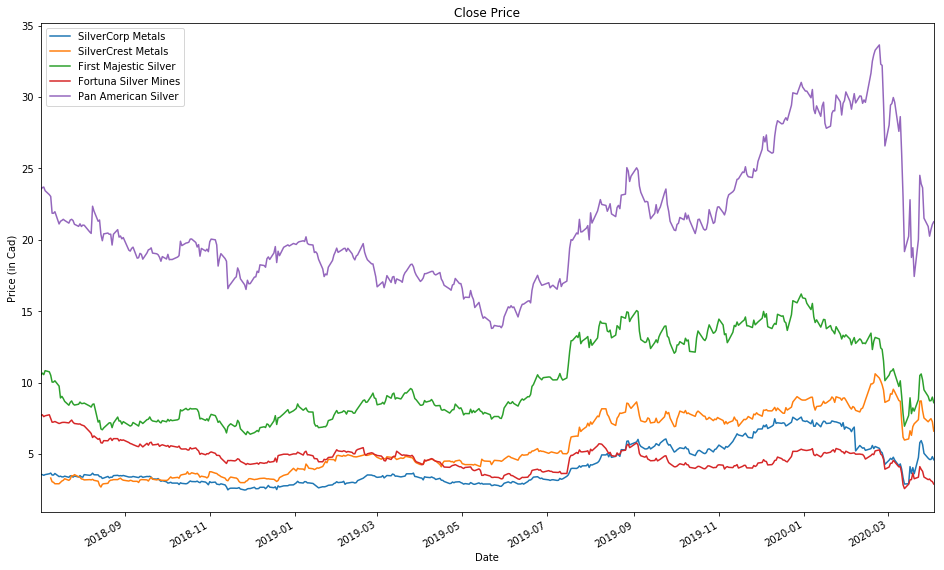

In [3]:
#Plot based on Closing prices
svm['Adj Close'].plot(label='SilverCorp Metals', figsize=(16,10), title='Close Price')
sil['Adj Close'].plot(label='SilverCrest Metals')
fr['Adj Close'].plot(label='First Majestic Silver')
fvi['Adj Close'].plot(label='Fortuna Silver Mines')
paas['Adj Close'].plot(label='Pan American Silver')
plt.ylabel('Price (in Cad)')
plt.legend();

Now, lets take a look at the 50 day moving-average of each stocks adjusted close. We can more clearly see once again the bull run that happened for all of them in July of 2019.

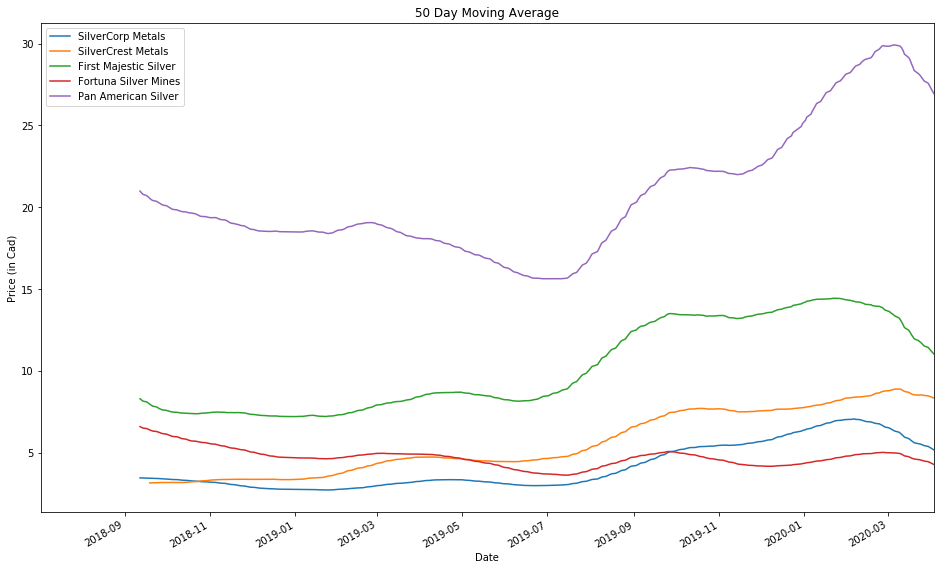

In [4]:
#Create new 50 day moving average column in each dataframe
svm['MA50'] = svm['Adj Close'].rolling(50).mean()
sil['MA50'] = sil['Adj Close'].rolling(50).mean()
fr['MA50'] = fr['Adj Close'].rolling(50).mean()
fvi['MA50'] = fvi['Adj Close'].rolling(50).mean()
paas['MA50'] = paas['Adj Close'].rolling(50).mean()

svm['MA50'].plot(label='SilverCorp Metals', figsize=(16,10), title='50 Day Moving Average')
sil['MA50'].plot(label='SilverCrest Metals')
fr['MA50'].plot(label='First Majestic Silver')
fvi['MA50'].plot(label='Fortuna Silver Mines')
paas['MA50'].plot(label='Pan American Silver')
plt.ylabel('Price (in Cad)')
plt.legend();

Lets directly look at the correlation between all of their adjusted closing prices. As suggested from the graphs above, we indeed do have a positive correlation between all of the stocks. PAAS seems to have the strongest correlation to the rest of the stocks, and SIL seems to have the weakest. The highest correlation being between PAAS and FR, and the lowest between.

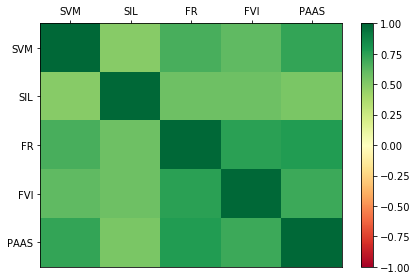

In [5]:
silver_close = pd.concat([svm['Adj Close'], sil['Adj Close'], fr['Adj Close'], fvi['Adj Close'], paas['Adj Close']], axis=1)
silver_close.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_close = silver_close.pct_change()
silver_corr = silver_close.corr()

data = silver_corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = silver_corr.columns
row_labels = silver_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
heatmap.set_clim(-1, 1)
plt.tight_layout()

In [6]:
silver_corr.head()

,SVM,SIL,FR,FVI,PAAS
SVM,1.000000,0.496640,0.673408,0.610155,0.728876
SIL,0.496640,1.000000,0.577677,0.572974,0.537664
FR,0.673408,0.577677,1.000000,0.750649,0.779429
FVI,0.610155,0.572974,0.750649,1.000000,0.705919
PAAS,0.728876,0.537664,0.779429,0.705919,1.000000


To get a closer look, lets make a scatter matrix. Once again, we see large tight groupings in PAAS, SVM, FR and FVI, and a more disperse, yet still distinct, shape for SIL.

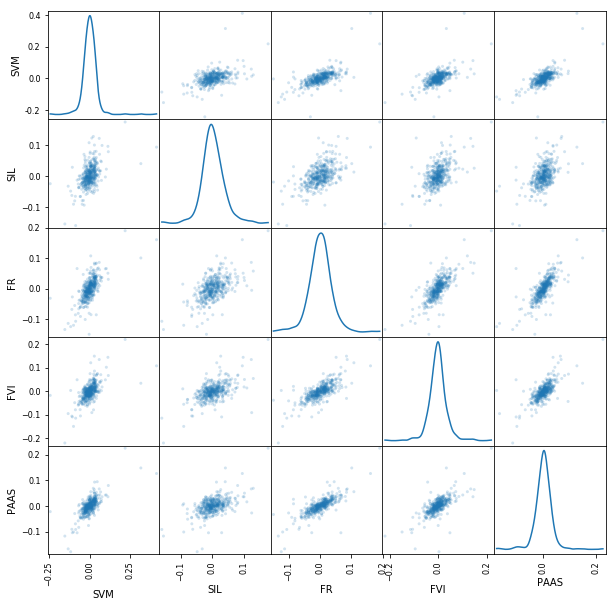

In [7]:
axes = scatter_matrix(silver_close, figsize=(10,10), alpha=0.2, diagonal='kde')

#Some floating point values in SVM needed to be rounded
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels);

### Analyzing Volume Traded
<a id='volume'></a>
So we have seen an obvious correlation in all five stocks adjusted close, but what about their daily volume traded? If they have similar peaks and valleys, do their volumes reflect that? Note that all five companies have a different amount of total stocks and they can be seen in the table below. Lets start by plotting each of theirs volumes.

<table style="float:left">
    <tr>
        <th></th>
        <th>SVM</th>
        <th>SIL</th>
        <th>FR</th>
        <th>FVI</th>
        <th>PAAS</th>
    </tr>
    <tr>
        <td>Total Shares (in millions)</td>
        <td>173</td>
        <td>110</td>
        <td>209</td>
        <td>160</td>
        <td>210</td>
    </tr>
</table>

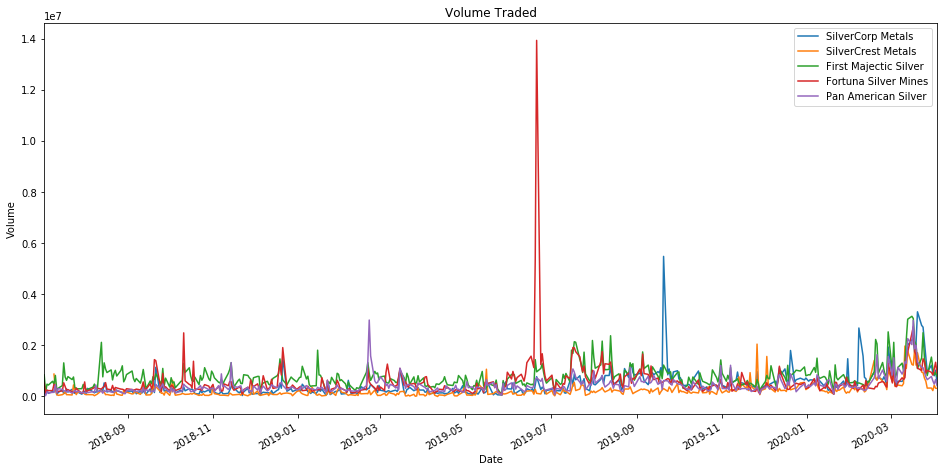

In [8]:
#Compare volume traded
svm['Volume'].plot(label='SilverCorp Metals', figsize=(16,8), title='Volume Traded')
sil['Volume'].plot(label='SilverCrest Metals')
fr['Volume'].plot(label='First Majectic Silver')
fvi['Volume'].plot(label='Fortuna Silver Mines')
paas['Volume'].plot(label='Pan American Silver')
plt.ylabel('Volume')
plt.legend();

At first glance it doesn't look like there is much correlation between their volumes traded, as most of there large volume peaks happen at different times. But looking closer, theres does seem to be some dates were there volumes traded spike together, most notably in February and March 2020. Lets take a closer look at the correlation between them.

In [9]:
#Create new dataframe with max volume, max vol date, and the high and low of that day for each stock
data = {'SVM':["{:,.0f}".format(svm['Volume'].max()), svm['Volume'].idxmax().strftime("%b %d %Y"), svm.loc[svm['Volume'].idxmax(),'High'], svm.loc[svm['Volume'].idxmax(),'Low']],
        'SIL':["{:,.0f}".format(sil['Volume'].max()), sil['Volume'].idxmax().strftime("%b %d %Y"), sil.loc[sil['Volume'].idxmax(),'High'], sil.loc[sil['Volume'].idxmax(),'Low']],
        'FR':["{:,.0f}".format(fr['Volume'].max()), fr['Volume'].idxmax().strftime("%b %d %Y"), fr.loc[fr['Volume'].idxmax(),'High'], fr.loc[fr['Volume'].idxmax(),'Low']],
        'FVI':["{:,.0f}".format(fvi['Volume'].max()), fvi['Volume'].idxmax().strftime("%b %d %Y"), fvi.loc[fvi['Volume'].idxmax(),'High'], fvi.loc[fvi['Volume'].idxmax(),'Low']],
        'PAAS':["{:,.0f}".format(paas['Volume'].max()), paas['Volume'].idxmax().strftime("%b %d %Y"), paas.loc[paas['Volume'].idxmax(),'High'], paas.loc[paas['Volume'].idxmax(),'Low']]}
df= pd.DataFrame(data, index= ['Max Volume', 'Date', 'High', 'Low'])

df

,SVM,SIL,FR,FVI,PAAS
Max Volume,"5,480,400","2,048,300","3,136,900","13,931,100","2,991,000"
Date,Sep 20 2019,Nov 26 2019,Mar 16 2020,Jun 21 2019,Feb 21 2019
High,5.9,7.93,8.15,3.9,19.14
Low,5.65,7.47,5.3,3.7,18.36


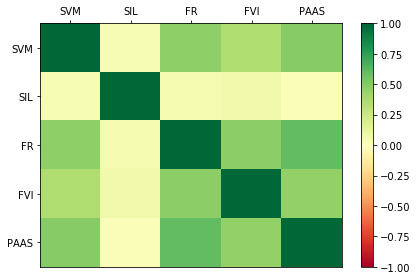

In [10]:
silver_volume = pd.concat([svm['Volume'], sil['Volume'], fr['Volume'], fvi['Volume'], paas['Volume']], axis=1)
silver_volume.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS']
silver_volume = silver_volume.pct_change()
silver_corr = silver_volume.corr()

data = silver_corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = silver_corr.columns
row_labels = silver_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
heatmap.set_clim(-1, 1)
plt.tight_layout()

As seen in the above heatmap theres a weaker correlation between SVM, FR, FVI and PAAS. What interesting though, is that SIL's volume seems to have no correlation to any of the others.

In [11]:
silver_corr.head()

,SVM,SIL,FR,FVI,PAAS
SVM,1.000000,0.039700,0.469320,0.363648,0.494610
SIL,0.039700,1.000000,0.057513,0.072057,0.027694
FR,0.469320,0.057513,1.000000,0.476638,0.606542
FVI,0.363648,0.072057,0.476638,1.000000,0.459040
PAAS,0.494610,0.027694,0.606542,0.459040,1.000000


### Comparing Silver Spot Price
<a id='silverSpot'></a>
Now lets compare each of them to the silver spot price. The data we will be using is the monthly highs, lows and averages from the Perth Mint and we will be getting it from [quandl](https://www.quandl.com/data/PERTH/SLVR_USD_M-Silver-Spot-Prices-USD-Monthly). Note that this data is monthly data and it is in USD, so we will resample our current daily data to monthly averages and we will use percentage changes so currency shouldn't affect the outcome too much. 

In [12]:
sp = web.DataReader('PERTH/SLVR_USD_M', 'quandl', start, end, api_key='HN852weh2C8ymszNWadY')
sp.tail()

,BidHigh,AskHigh,BidLow,AskLow,BidAverage,AskAverage
Date,,,,,,
2018-11-30,14.64,14.91,13.84,14.09,14.24,14.51
2018-10-31,14.69,14.93,14.13,14.41,14.45,14.72
2018-09-30,14.41,14.68,13.93,14.18,14.12,14.39
2018-08-31,15.40,15.64,14.24,14.48,14.87,15.13
2018-07-31,16.03,16.31,15.11,15.39,15.61,15.88


Our spot price data consists of the ask and bid highs, lows and averages. We will only concern ourselves with the ask average, which can be seen plotted below.

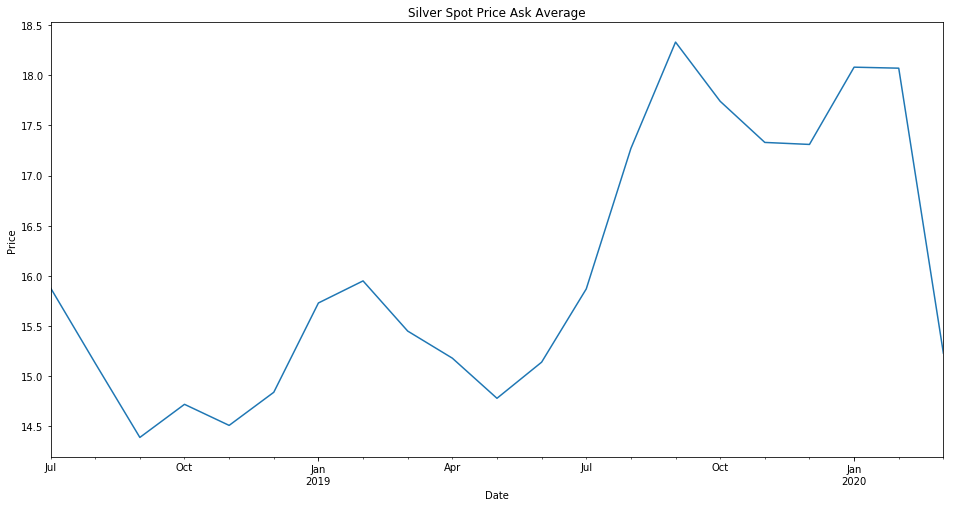

In [13]:
sp['AskAverage'].plot(figsize=(16, 8), title='Silver Spot Price Ask Average')
plt.ylabel('Price');

Lets resample our data and plot each of their precent change in adjust close versus the spot price's percent change in ask average.

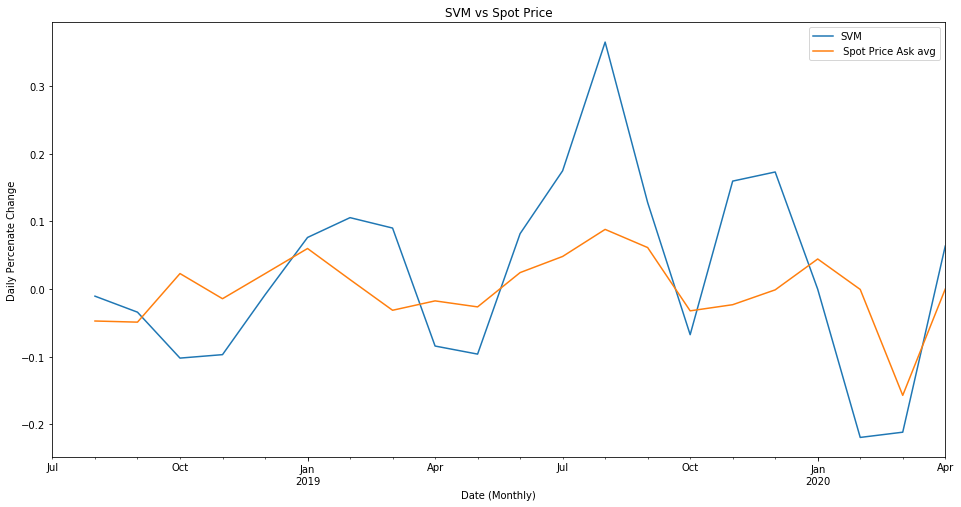

In [14]:
svm_resample = svm.resample('M').mean()
sil_resample = sil.resample('M').mean()
fr_resample = fr.resample('M').mean()
fvi_resample = fvi.resample('M').mean()
paas_resample = paas.resample('M').mean()

comp_spot = pd.concat([svm_resample['Adj Close'], sil_resample['Adj Close'], fr_resample['Adj Close'], fvi_resample['Adj Close'], paas_resample['Adj Close'], sp['AskAverage']], axis=1)
comp_spot.columns = ['SVM', 'SIL', 'FR', 'FVI', 'PAAS', 'Spot Ask']
comp_spot = comp_spot.pct_change()


comp_spot['SVM'].plot(label='SVM', figsize=(16,8), title='SVM vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

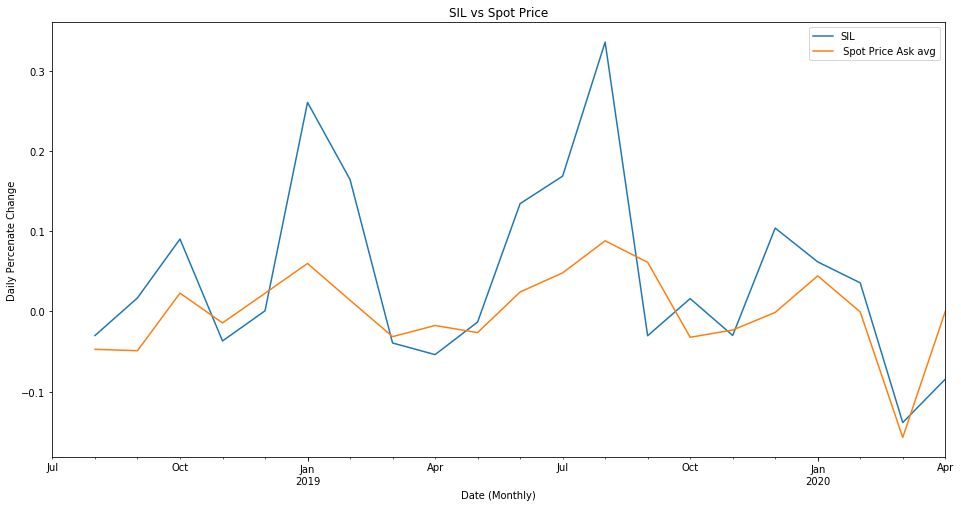

In [15]:
comp_spot['SIL'].plot(label='SIL', figsize=(16,8), title='SIL vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

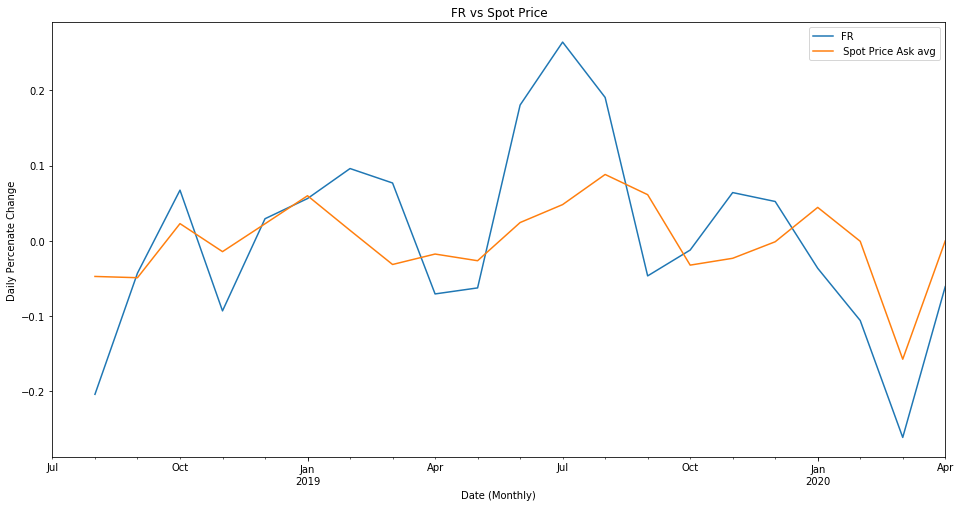

In [16]:
comp_spot['FR'].plot(label='FR', figsize=(16,8), title='FR vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

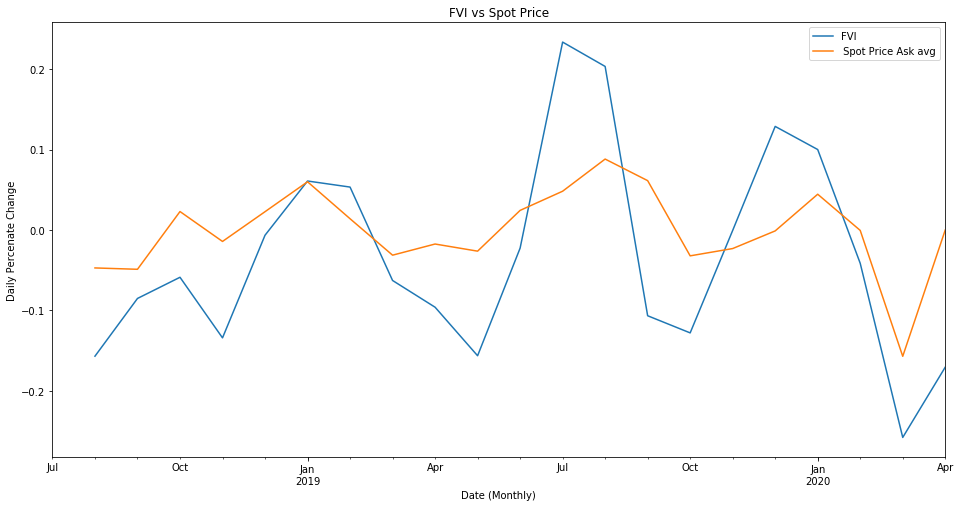

In [17]:
comp_spot['FVI'].plot(label='FVI', figsize=(16,8), title='FVI vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

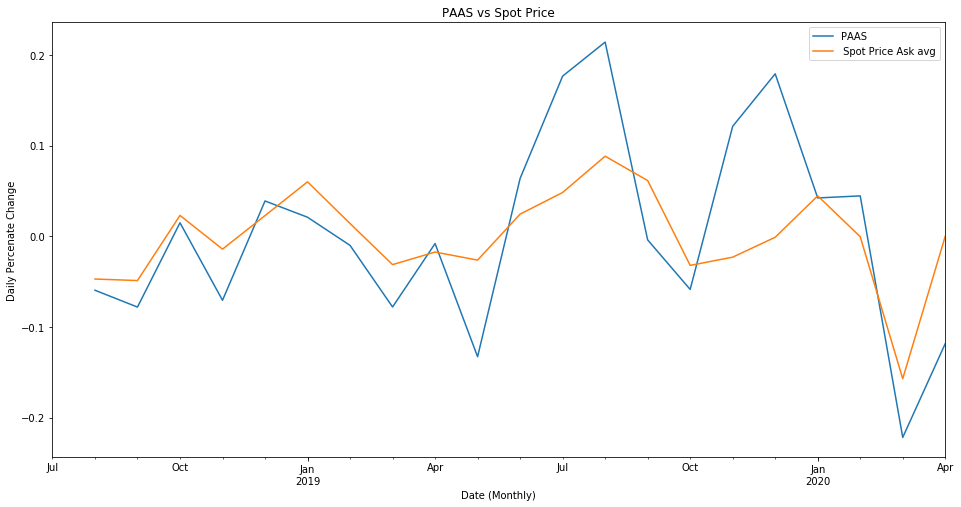

In [18]:
comp_spot['PAAS'].plot(label='PAAS', figsize=(16,8), title='PAAS vs Spot Price')
comp_spot['Spot Ask'].plot(label=' Spot Price Ask avg')
plt.xlabel('Date (Monthly)')
plt.ylabel('Daily Percenate Change')
plt.legend();

Taking a closer look at the plots, we can see three distinct peaks that occur in the spot price, as well as in the stocks, in January 2019, July 2019 and January 2020. There is also a very distinct valley seen in February/March 2020. Lets create a heat map of their correlation.

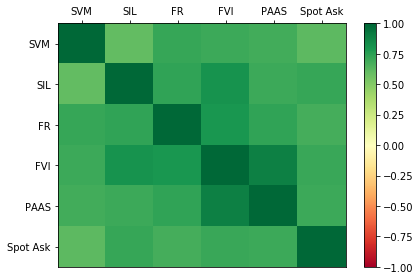

In [19]:
spot_corr = comp_spot.corr()

data = spot_corr.values
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = spot_corr.columns
row_labels = spot_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
heatmap.set_clim(-1, 1)
plt.tight_layout()

Looking at the Spot price column, it can be seen that there is a strong correlation between its ask average and the adjusted close of the silver stocks. It would be better if we could compare daily data instead of monthly averages to get more accurate information, but for what we have, we can say there is a correlation between the silver spot price and silver mining stocks.

As a side note, we do see a deeper correlation between the silver stocks when we look at them from a monthly view. The should be expected, as now we are looking at the distinct peaks and valleys over a larger time frame, so smaller peaks and valleys caused be high volatility aren't seen.

In [20]:
spot_corr

,SVM,SIL,FR,FVI,PAAS,Spot Ask
SVM,1.000000,0.607855,0.724447,0.703426,0.687555,0.618810
SIL,0.607855,1.000000,0.736145,0.819165,0.703766,0.723046
FR,0.724447,0.736145,1.000000,0.798892,0.737943,0.685548
FVI,0.703426,0.819165,0.798892,1.000000,0.894964,0.716608
PAAS,0.687555,0.703766,0.737943,0.894964,1.000000,0.706012
Spot Ask,0.618810,0.723046,0.685548,0.716608,0.706012,1.000000
